- Bibliotecas importadas para analisis y modelado de datos

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from typing import List
import seaborn as sns
import matplotlib.pyplot as plt

- Resumen de metodos aprendidos durante la materia:

-pd.read_csv


-dropna.()


-pop()


pd.concat


-  Exploración y limpieza de Datos

In [18]:

# FUNCTIONS
def get_sheet_names(file_path: str) -> List[str]:
    

    xls = pd.ExcelFile(file_path)
    
    
    sheet_names = xls.sheet_names
    
   
    return sheet_names


# 1. Extración de datos 

In [19]:

file_path = "data/ingreso_joyas_plata.xlsx"
sheet_names = get_sheet_names(file_path)
print("Sheet names:")
print(sheet_names)

Sheet names:
['anillos_plata', 'dijes_plata', 'juegos_plata', 'collares_plata', 'aretes_plata', 'cadena_plata', 'pulseras_plata', 'varios_plata', 'juegos_piedras_perlas', 'proveedores']


In [20]:

proveedores_name = sheet_names.pop()
proveedores_df = pd.read_excel(file_path, sheet_name=proveedores_name)
proveedores_df.shape

(66, 3)

In [21]:

list_of_df = []
for s in sheet_names:
    print(f"Sheet Name: {s}")
    # Read sheet and add new column with sheet name
    df = pd.read_excel(file_path, sheet_name=s)
    df["source"] = s

    # Replace "invetario" in column names with "ingreso"
    df.columns = [c.replace("inventario", "ingreso") for c in df.columns]
    
    # Append and print info
    list_of_df.append(df)
    print(f"Shape: {df.shape}")
    print(f"Column Names: {df.columns}\n")

Sheet Name: anillos_plata
Shape: (600, 15)
Column Names: Index(['fecha_compra', 'codigo', 'talla', 'ingreso_14/03/23',
       'ingreso_25/04/23', 'ingreso_27/03/24', 'ingreso_09/05/24', 'peso',
       'costo_gramo', 'costo', 'pvp', 'detalle', 'proveedor', 'nota',
       'source'],
      dtype='object')

Sheet Name: dijes_plata
Shape: (726, 20)
Column Names: Index(['fecha_compra', 'codigo', 'ingreso_14/03/23', 'ingreso_28/04/23',
       'ingreso_15/06/23', 'ingreso_18/08/23', 'ingreso_28/09/23',
       'ingreso_19/12/23', 'ingreso_07/03/24', 'ingreso_10/05/24',
       'ingreso_20/06/24', 'ingreso_08/07/24', 'peso', 'costo_gramo', 'costo',
       'pvp', 'detalle', 'proveedor', 'nota', 'source'],
      dtype='object')

Sheet Name: juegos_plata
Shape: (215, 18)
Column Names: Index(['fecha_compra', 'codigo', 'ingreso_14/03/23', 'ingreso_28/04/23',
       'ingreso_20/06/23', 'ingreso_28/09/23', 'ingreso_18/11/23',
       'ingreso_15/12/23', 'ingreso_07/03/24', 'ingreso_16/05/24', 'peso',
   

In [22]:
# Consolidate (concat) spreadsheets in one dataframe
all = pd.concat(list_of_df)
print(f"Sheet Name: all")
print(f"Shape: {all.shape}")
all.info()

Sheet Name: all
Shape: (2584, 37)
<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 8
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha_compra      2584 non-null   datetime64[ns]
 1   codigo            2584 non-null   object        
 2   talla             599 non-null    object        
 3   ingreso_14/03/23  1784 non-null   float64       
 4   ingreso_25/04/23  74 non-null     float64       
 5   ingreso_27/03/24  1 non-null      float64       
 6   ingreso_09/05/24  51 non-null     float64       
 7   peso              2575 non-null   float64       
 8   costo_gramo       2575 non-null   float64       
 9   costo             2584 non-null   float64       
 10  pvp               2584 non-null   float64       
 11  detalle           2584 non-null   object        
 12  proveedor         2584 non-null   object        
 13  nota              448 non-null    object        
 14

En la celda siguiente correjimos o formateamos los datos de acuerdo a lo necesitado para seguir con el analisis de datos

In [23]:
# I noticed costo is of type object which means there are mixed types in it
# The following code catches elements of type str in the column so we can fix it in the file
costo_is_str_instance = all.costo.apply(lambda x: isinstance(x, str))
all[costo_is_str_instance][["codigo", "source"]]

,codigo,source


# 2. Transformar (data quality)

- 2.1 Verify data types of every column (manual)
- 2.2 Check missing values for each column
- 2.3 Check ```peso``` or ```costo_gramo``` equal to ```0```
- 2.4 Rename provedores using ```proveedores_df```
- 2.5 Melt: Dataframe from wide to long format

In [24]:
# 2.2 analizar la presencia de valores vacios 
print(all.isna().sum())


fecha_compra           0
codigo                 0
talla               1985
ingreso_14/03/23     800
ingreso_25/04/23    2510
ingreso_27/03/24    2583
ingreso_09/05/24    2533
peso                   9
costo_gramo            9
costo                  0
pvp                    0
detalle                0
proveedor              0
nota                2136
source                 0
ingreso_28/04/23    2489
ingreso_15/06/23    2525
ingreso_18/08/23    2511
ingreso_28/09/23    2553
ingreso_19/12/23    2523
ingreso_07/03/24    2518
ingreso_10/05/24    2510
ingreso_20/06/24    2571
ingreso_08/07/24    2572
ingreso_20/06/23    2551
ingreso_18/11/23    2476
ingreso_15/12/23    2448
ingreso_16/05/24    2522
ingreso_26/04/23    2524
ingreso_05/06/24    2565
ingreso_21/04/23    2561
ingreso_14/06/24    2555
ingreso_26/03/24    2581
ingreso_23/02/23    2581
ingreso_08/03/24    2580
ingreso_29/03/23    2576
ingreso_04/06/24    2583
dtype: int64


In [25]:
# INSPECT:
# fecha_compra
print('Missings in fecha_compra:')
print(all.loc[all.fecha_compra.isnull(), ['codigo', 'source']])

# peso
print('\nMissings in peso:')
print(all.loc[all.peso.isnull(), ['codigo', 'source']])

# costo_gramo
print('\nMissings in costo_gramo:')
print(all.loc[all.costo_gramo.isnull(), ['codigo', 'source']])

# costo
print('\nMissings in costo:')
print(all.loc[all.costo.isnull(), ['codigo', 'source']])

# costo
print('\nMissings proveedor:')
print(all.loc[all.proveedor.isnull(), ['codigo', 'source']])

Missings in fecha_compra:
Empty DataFrame
Columns: [codigo, source]
Index: []

Missings in peso:
  codigo                 source
0  JV001  juegos_piedras_perlas
1  JV002  juegos_piedras_perlas
2  JV003  juegos_piedras_perlas
3  JV004  juegos_piedras_perlas
4  JV005  juegos_piedras_perlas
5  JV006  juegos_piedras_perlas
6  JV007  juegos_piedras_perlas
7  JV008  juegos_piedras_perlas
8  JV009  juegos_piedras_perlas

Missings in costo_gramo:
  codigo                 source
0  JV001  juegos_piedras_perlas
1  JV002  juegos_piedras_perlas
2  JV003  juegos_piedras_perlas
3  JV004  juegos_piedras_perlas
4  JV005  juegos_piedras_perlas
5  JV006  juegos_piedras_perlas
6  JV007  juegos_piedras_perlas
7  JV008  juegos_piedras_perlas
8  JV009  juegos_piedras_perlas

Missings in costo:
Empty DataFrame
Columns: [codigo, source]
Index: []

Missings proveedor:
Empty DataFrame
Columns: [codigo, source]
Index: []


In [26]:
# 2.3 Check peso or costo_gramo <= 0
# ACTION NEEDED: Manually fix the file with non-zero values
print('Rows with costo_gramo <= 0')
print(all[all.costo_gramo<=0][['codigo', 'source', 'costo_gramo', 'peso', 'costo']])

print('\nRows with peso <= 0')
print(all[all.peso<=0][['codigo', 'source', 'costo_gramo', 'peso', 'costo']])

print('\nRows with costo <= 0 as consequense of peso <= 0 OR costo_gramo <= 0')
print(all[all.costo<=0][['codigo', 'source', 'costo_gramo', 'peso', 'costo']])

Rows with costo_gramo <= 0
Empty DataFrame
Columns: [codigo, source, costo_gramo, peso, costo]
Index: []

Rows with peso <= 0
Empty DataFrame
Columns: [codigo, source, costo_gramo, peso, costo]
Index: []

Rows with costo <= 0 as consequense of peso <= 0 OR costo_gramo <= 0
Empty DataFrame
Columns: [codigo, source, costo_gramo, peso, costo]
Index: []


In [27]:
# 2.4 Renombrar proveedores

dict_of_proveedores_1 = {k:v for k,v in zip(proveedores_df.Proveedor, proveedores_df['Nuevo Nombre'])}

all['proveedor'] = all.proveedor.replace(dict_of_proveedores_1)

print(f'Unique providers after 1st iteration: \n{all.proveedor.unique()} \n')

# Create new dictionary for remaining values {old_name : new_name}
dict_of_proveedores_2 = {
    'China':'CHINA', 
    'Cirkon ':'CIRKON', 
    'Cirkon  ':'CIRKON',
    'flavio jara':'FLAVIO JARA', 
    'CAMBIO DE CODIGO':'VOGA',
        ' ':'VOGA',
        '*': 'VOGA',
        'LX, N.Y.':'LX USA',
        'Alina ' :'ALINA PAZ',
        'Andres ' :'ANDRES CADAVID',
        'Feria Mia' : 'MIAMI',
        'pedir': 'VOGA'
    }

# usar el nuevo diccionario para reemplazar los nombres incorrectos
all['proveedor'] = all.proveedor.replace(dict_of_proveedores_2)

# Validate unique names again
print(f'Unique providers after 2nd iteration: \n{all.proveedor.unique()}')


Unique providers after 1st iteration: 
['VOGA' 'SOLEDAD SAENZ' 'China' 'ALPHA TRADING' 'XAVIER GUILLEN'
 'ALEX CASTRO' 'RIOBAMBA' 'ANDRES CADAVID' 'CIRKON' 'flavio jara'
 'JUAN CHALCO' 'ALINA PAZ' 'PALACIO JOYAS' 'SEMPERTEGUI' 'MILANUS USA'
 'LX USA' 'FLAVIO JARA' 'CHINA' 'Cirkon  ' 'ZAFIRO CHORDELEG'
 'CAMBIO DE CODIGO' 'USA' ' ' 'P&K' 'BODY JEWELZ' '*' 'LX, N.Y.' 'Alina '
 'Andres ' 'Feria Mia' 'pedir' 'FERNANDO JARA' 'PANAMA' 'Cirkon '
 'GUILLERMO PARRA'] 

Unique providers after 2nd iteration: 
['VOGA' 'SOLEDAD SAENZ' 'CHINA' 'ALPHA TRADING' 'XAVIER GUILLEN'
 'ALEX CASTRO' 'RIOBAMBA' 'ANDRES CADAVID' 'CIRKON' 'FLAVIO JARA'
 'JUAN CHALCO' 'ALINA PAZ' 'PALACIO JOYAS' 'SEMPERTEGUI' 'MILANUS USA'
 'LX USA' 'ZAFIRO CHORDELEG' 'USA' 'P&K' 'BODY JEWELZ' 'MIAMI'
 'FERNANDO JARA' 'PANAMA' 'GUILLERMO PARRA']


## 2.5 Melt

Mediante el uso de la funcion "MELT" vamos a crear un nuevo dataframe consolidado el cual tiene toda la data relevante y limpia para poder realizar un analisis mas profundo-




In [28]:
# Especificar las columnas que no deben ser melted
id_vars = ['fecha_compra', 'codigo', 'talla', 'peso',
       'costo_gramo', 'costo', 'pvp', 'detalle', 'proveedor', 'nota', 'source']

# Realizar el melt del dataframe
all_melted = pd.melt(all, id_vars=id_vars, var_name='fecha_ingreso', value_name='count_items')

# Limpiar la columna 'fecha' para extraer la fecha en el formato correcto
all_melted['fecha_ingreso'] = all_melted['fecha_ingreso'].str.replace('ingreso_', '')

# Eliminar las filas con valores perdidos en la columna 'items'
# Esto corresponde a items que no tienen ingresos registrados
all_melted.dropna(subset=['count_items'], inplace=True)

all_melted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2883 entries, 0 to 67183
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fecha_compra   2883 non-null   datetime64[ns]
 1   codigo         2883 non-null   object        
 2   talla          582 non-null    object        
 3   peso           2874 non-null   float64       
 4   costo_gramo    2874 non-null   float64       
 5   costo          2883 non-null   float64       
 6   pvp            2883 non-null   float64       
 7   detalle        2883 non-null   object        
 8   proveedor      2883 non-null   object        
 9   nota           610 non-null    object        
 10  source         2883 non-null   object        
 11  fecha_ingreso  2883 non-null   object        
 12  count_items    2883 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 315.3+ KB


In [29]:
# verificar si existen filas con valores 0 en el nuevo archivo limpio
print("Count items with values = 0")
print(all_melted[all_melted.count_items==0][['codigo', 'source', 'fecha_ingreso', 'count_items']])

print("\n Lenght of fecha_ingreso")
print(all_melted.fecha_ingreso.str.len().value_counts(dropna=False))

Count items with values = 0
Empty DataFrame
Columns: [codigo, source, fecha_ingreso, count_items]
Index: []

 Lenght of fecha_ingreso
fecha_ingreso
8    2883
Name: count, dtype: int64


In [30]:
# Count items to int64
all_melted["count_items"] = all_melted.count_items.astype("Int64")

# fecha_ingreso to datetime- Format "dd/mm/yy"
all_melted["fecha_ingreso"] = pd.to_datetime(all_melted.fecha_ingreso, format="%d/%m/%y", errors='raise')  

all_melted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2883 entries, 0 to 67183
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fecha_compra   2883 non-null   datetime64[ns]
 1   codigo         2883 non-null   object        
 2   talla          582 non-null    object        
 3   peso           2874 non-null   float64       
 4   costo_gramo    2874 non-null   float64       
 5   costo          2883 non-null   float64       
 6   pvp            2883 non-null   float64       
 7   detalle        2883 non-null   object        
 8   proveedor      2883 non-null   object        
 9   nota           610 non-null    object        
 10  source         2883 non-null   object        
 11  fecha_ingreso  2883 non-null   datetime64[ns]
 12  count_items    2883 non-null   Int64         
dtypes: Int64(1), datetime64[ns](2), float64(4), object(6)
memory usage: 318.1+ KB


In [31]:
all_melted.head()

,fecha_compra,codigo,talla,peso,costo_gramo,costo,pvp,detalle,proveedor,nota,source,fecha_ingreso,count_items
0,2021-11-22,AP001,T6,2.3,2.4,5.52,18.7,llano 2 máscaras,VOGA,NaN,anillos_plata,2023-03-14,2
1,2021-11-22,AP001,T7,2.3,2.4,5.52,18.7,llano 2 máscaras,VOGA,NaN,anillos_plata,2023-03-14,1
2,2021-11-22,AP001,T9,2.3,2.4,5.52,18.7,llano 2 máscaras,VOGA,NaN,anillos_plata,2023-03-14,1
3,2021-11-22,AP002,T4,1.4,2.4,3.36,17.8,llano circulo figura grabada,VOGA,NaN,anillos_plata,2023-03-14,2
4,2021-11-22,AP002,T5,1.4,2.4,3.36,17.8,llano circulo figura grabada,VOGA,NaN,anillos_plata,2023-03-14,1


# 3. Guardar nuevo dataframe de resultado 

In [32]:
# 4. Save dataframe as Excel
all_melted.to_excel("data/clean_files/all_plata_melted.xlsx", index=False)

# 4. Analisis descriptivo de Datos 



**Descripción:**

#### Objetivo:
Realizar un análisis descriptivo detallado del archivo consolidado de inventario de joyería para obtener información valiosa sobre los proveedores, costos, precios de venta al público y distribución de tipos de joya.

#### Tareas:

1. **Análisis de Proveedores:**
   - Contar la cantidad de ítems que tiene cada proveedor.

2. **Proveedores con Mayor Valor de Compra:**
   - Identificar al proveedor al que más se le ha comprado en dólares utilizando la columna `costo`.

3. **Distribución de Costos y Precios de Venta al Público:**
   - Generar un histograma para visualizar la distribución de los costos y los precios de venta al público (PVP) de las joyas de acero y plata.

4. **Estadísticas Descriptivas por Tipo de Joya y Categoría:**
   - Calcular el mínimo, Q25, mediana, Q75 y máximo de cada tipo de joya (`source`)

5. **Tipo de Joya más Común por Material:**
   - Identificar el tipo de joya (anillos, pulseras, etc.) más común para cada material (`plata` y `acero`).

6. **Análisis de Proporción de Inventario por Material:**
   - Calcular la proporción del inventario total que corresponde a `plata` y `acero`.

7. **Análisis de Proporción de Inventario por Tipo de Joya:**
   - Calcular la proporción de cada tipo de joya (anillos, pulseras, cadenas, etc.) en el inventario total.

8. **Análisis de Costo Promedio por Tipo de Joya y Categoría:**
   - Calcular el costo promedio por cada tipo de joya (`source`) y categoría (`plata` y `acero`).

9. **Comparación de Márgenes de Ganancia:**
   - Comparar los márgenes de ganancia entre las joyas de `plata` y `acero` calculando la diferencia entre el `costo` y el `PVP`.

10. **Análisis de Tendencias Temporales (si aplica):**
    - Si se dispone de datos temporales, analizar las tendencias de compra y venta de joyas a lo largo del tiempo.

11. **Identificación de Outliers en Costos y PVP:**
    - Utilizar métodos estadísticos para identificar valores atípicos en los costos y precios de venta al público.

12. **Correlación entre Variables de Costo y PVP:**
    - Analizar la correlación entre el `costo` y el `PVP` para entender la relación entre estas variables.

13. **Segmentación de Proveedores por Volumen de Venta:**
    - Segmentar a los proveedores según el volumen de venta para identificar a los principales proveedores.

**Responsable:** Esteban Marín

In [33]:

filepath_clean = "data/clean_files/all_plata_melted.xlsx"

clean_inventory = pd.read_excel(filepath_clean)


In [34]:

total_items = clean_inventory.groupby('proveedor')['count_items'].sum()

total_items_df = total_items.reset_index()

total_items_df.columns = ['Proveedor', 'Total_Items']

total_items = total_items_df.sort_values("Total_Items", ascending= False)

print(total_items)


           Proveedor  Total_Items
6             CIRKON         2395
19     SOLEDAD SAENZ         1600
21              VOGA         1002
2      ALPHA TRADING          621
3     ANDRES CADAVID          610
14               P&K          430
11            LX USA          418
22    XAVIER GUILLEN          315
4        BODY JEWELZ          294
1          ALINA PAZ          286
8        FLAVIO JARA          265
0        ALEX CASTRO          232
13       MILANUS USA          206
20               USA          174
5              CHINA          131
7      FERNANDO JARA          119
10       JUAN CHALCO           40
12             MIAMI           24
18       SEMPERTEGUI           23
23  ZAFIRO CHORDELEG           23
9    GUILLERMO PARRA           10
17          RIOBAMBA            7
16            PANAMA            3
15     PALACIO JOYAS            2


1. determinar que item es el mas comprado a cada proveedor 

In [35]:

total_items = clean_inventory.groupby('proveedor')['count_items'].sum()

total_items_df = total_items.reset_index()

total_items_df.columns = ['Proveedor', 'Total_Items']

total_items = total_items_df.sort_values("Total_Items", ascending= False)

print(total_items)


           Proveedor  Total_Items
6             CIRKON         2395
19     SOLEDAD SAENZ         1600
21              VOGA         1002
2      ALPHA TRADING          621
3     ANDRES CADAVID          610
14               P&K          430
11            LX USA          418
22    XAVIER GUILLEN          315
4        BODY JEWELZ          294
1          ALINA PAZ          286
8        FLAVIO JARA          265
0        ALEX CASTRO          232
13       MILANUS USA          206
20               USA          174
5              CHINA          131
7      FERNANDO JARA          119
10       JUAN CHALCO           40
12             MIAMI           24
18       SEMPERTEGUI           23
23  ZAFIRO CHORDELEG           23
9    GUILLERMO PARRA           10
17          RIOBAMBA            7
16            PANAMA            3
15     PALACIO JOYAS            2


2. **Proveedores con Mayor Valor de Compra:**
   - Identificar al proveedor al que más se le ha comprado en dólares utilizando la columna `costo`.

In [36]:
compra_total_proveedor = clean_inventory.groupby(["proveedor"])["costo"].sum()
compra_total_proveedor.sort_values(ascending=False)

proveedor
CIRKON              6149.6030
SOLEDAD SAENZ       5421.2500
VOGA                4315.2005
ALPHA TRADING       2056.5600
ANDRES CADAVID      1949.5500
XAVIER GUILLEN      1902.8210
FLAVIO JARA          921.5800
LX USA               761.9300
ALINA PAZ            668.9700
USA                  419.5610
CHINA                364.4100
JUAN CHALCO          299.3500
MILANUS USA          230.9570
ALEX CASTRO          205.6300
P&K                  196.1450
RIOBAMBA             137.7600
FERNANDO JARA        101.2100
BODY JEWELZ           85.9000
MIAMI                 66.0120
ZAFIRO CHORDELEG      51.6000
GUILLERMO PARRA       40.0000
SEMPERTEGUI           16.0400
PANAMA                 3.8000
PALACIO JOYAS          1.6800
Name: costo, dtype: float64


3. **Distribución de Costos y Precios de Venta al Público:**
   - Generar un histograma para visualizar la distribución de los costos y los precios de venta al público (PVP) de las joyas 


<Axes: xlabel='costo', ylabel='Count'>

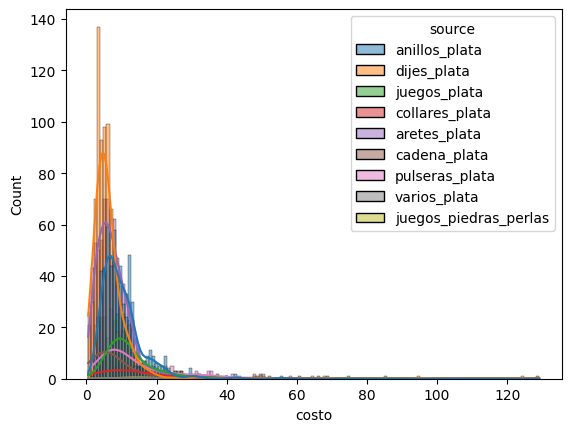

In [37]:

# Equivalent to:
sns.histplot(x = "costo", hue = "source", data = clean_inventory, kde=True)


<Axes: xlabel='pvp', ylabel='Count'>

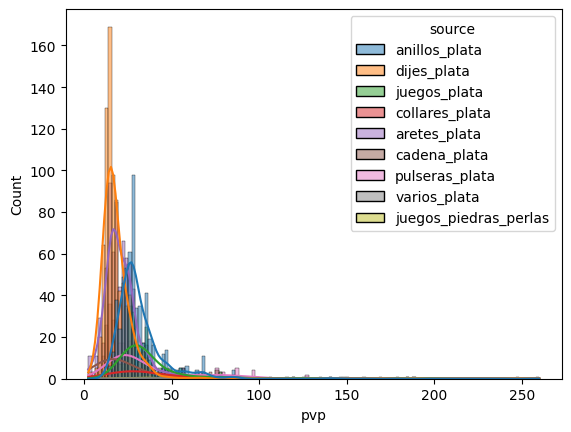

In [38]:
sns.histplot(x = "pvp", hue = "source", data = clean_inventory, kde=True)


4. **Estadísticas Descriptivas por Tipo de Joya y Categoría:**
   - Calcular el mínimo, Q25, mediana, Q75 y máximo de cada tipo de joya 

In [39]:
clean_inventory.groupby('source')['pvp'].agg(
    min=('min'),
    q25=(lambda x: x.quantile(0.25)),
    q50=('median'),
    mean=('mean'),
    q75=(lambda x: x.quantile(0.75)),
    max=('max')
).reset_index()

,source,min,q25,q50,mean,q75,max
0,anillos_plata,12.0,24.60,27.80,31.393396,35.80,140.0
1,aretes_plata,2.5,15.40,19.70,21.807551,25.80,78.9
2,cadena_plata,9.8,14.45,16.70,28.522500,28.90,185.6
3,collares_plata,12.4,23.85,27.90,38.218966,38.90,260.0
4,dijes_plata,2.8,13.50,16.20,18.990196,21.50,247.0
5,juegos_piedras_perlas,27.8,28.70,34.70,40.544444,42.00,87.0
6,juegos_plata,17.8,26.55,30.75,36.963445,37.55,187.8
7,pulseras_plata,8.5,19.80,26.70,37.058000,45.00,149.7
8,varios_plata,18.5,30.90,46.05,46.680000,57.55,78.9


8. **Análisis de Costo Promedio por Tipo de Joya y Categoría:**
   - Calcular el costo promedio por cada tipo de joya 

In [40]:
costo_promedio_joya= pd.DataFrame(clean_inventory.groupby(["source"])["costo"].mean().sort_values(ascending=False))
costo_promedio_joya_df = costo_promedio_joya.reset_index()
costo_promedio_joya_df

,source,costo
0,varios_plata,18.706000
1,juegos_piedras_perlas,17.555556
2,collares_plata,14.416839
3,pulseras_plata,13.754662
4,juegos_plata,13.127773
5,cadena_plata,10.267664
6,anillos_plata,9.904134
7,aretes_plata,7.660230
8,dijes_plata,6.490719


11. **Identificación de Outliers en Costos y PVP:**
    - Utilizar métodos estadísticos para identificar valores atípicos en los costos y precios de venta al público.


In [41]:
analisis_costo =clean_inventory.groupby(["source"])['costo'].agg(
    min=('min'),
    q25=(lambda x: x.quantile(0.25)),
    q50=('median'),
    mean=('mean'),
    q75=(lambda x: x.quantile(0.75)),
    max=('max')
).reset_index()

analisis_costo

,source,min,q25,q50,mean,q75,max
0,anillos_plata,1.750,6.0000,8.50,9.904134,12.25000,56.000
1,aretes_plata,0.500,4.2000,6.72,7.660230,10.00000,36.520
2,cadena_plata,2.405,4.0000,5.64,10.267664,10.46625,68.475
3,collares_plata,2.000,7.0000,10.80,14.416839,15.00000,129.120
4,dijes_plata,0.600,3.5000,5.28,6.490719,7.26750,124.070
5,juegos_piedras_perlas,12.000,14.0000,15.00,17.555556,16.00000,40.000
6,juegos_plata,4.320,8.1375,10.50,13.127773,14.36250,85.140
7,pulseras_plata,2.400,7.0000,10.00,13.754662,16.80000,64.800
8,varios_plata,5.000,12.2850,18.19,18.706000,23.72000,32.880


In [42]:
analisis_pvp =clean_inventory.groupby(["source"])['pvp'].agg(
    min=('min'),
    q25=(lambda x: x.quantile(0.25)),
    q50=('median'),
    mean=('mean'),
    q75=(lambda x: x.quantile(0.75)),
    max=('max')
).reset_index()

analisis_pvp

,source,min,q25,q50,mean,q75,max
0,anillos_plata,12.0,24.60,27.80,31.393396,35.80,140.0
1,aretes_plata,2.5,15.40,19.70,21.807551,25.80,78.9
2,cadena_plata,9.8,14.45,16.70,28.522500,28.90,185.6
3,collares_plata,12.4,23.85,27.90,38.218966,38.90,260.0
4,dijes_plata,2.8,13.50,16.20,18.990196,21.50,247.0
5,juegos_piedras_perlas,27.8,28.70,34.70,40.544444,42.00,87.0
6,juegos_plata,17.8,26.55,30.75,36.963445,37.55,187.8
7,pulseras_plata,8.5,19.80,26.70,37.058000,45.00,149.7
8,varios_plata,18.5,30.90,46.05,46.680000,57.55,78.9


12. **Correlación entre Variables de Costo y PVP:**
    - Analizar la correlación entre el `costo` y el `PVP` para entender la relación entre estas variables.

<Axes: xlabel='costo', ylabel='pvp'>

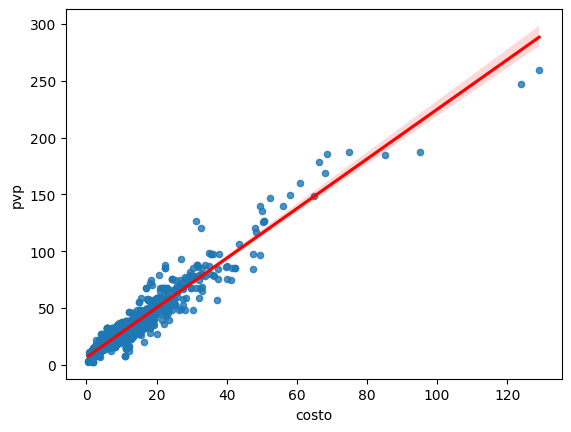

In [43]:


# Crear un scatter plot con una línea de regresión lineal
sns.regplot(data=clean_inventory, x="costo", y="pvp", scatter_kws={"s": 20}, line_kws={"color": "red"})




13. **Segmentación de Proveedores por Volumen de Venta:**
    - Segmentar a los proveedores según el volumen de venta para identificar a los principales proveedores.

In [44]:
volumen_venta= clean_inventory.groupby('proveedor')["costo"].sum().reset_index().sort_values("costo",ascending= False)

volumen_venta


,proveedor,costo
6,CIRKON,6149.6030
19,SOLEDAD SAENZ,5421.2500
21,VOGA,4315.2005
2,ALPHA TRADING,2056.5600
3,ANDRES CADAVID,1949.5500
22,XAVIER GUILLEN,1902.8210
8,FLAVIO JARA,921.5800
11,LX USA,761.9300
1,ALINA PAZ,668.9700
20,USA,419.5610
